
### **Paso 1: Configuración del entorno**
Antes de comenzar, asegúrate de tener instaladas las bibliotecas necesarias. Puedes instalarlas usando `pip`:

```bash
pip install numpy matplotlib networkx scipy easydict requests tqdm appdirs pillow
```

También descarga el dataset desde el enlace proporcionado:
- [Willow-Object-Class Dataset](https://huggingface.co/heatingma/pygmtools/resolve/main/WILLOW-ObjectClass_dataset.zip)

Descomprime el archivo ZIP en una carpeta llamada `data/WillowObject/WILLOW-ObjectClass`.

---

### **Paso 2: Crear funciones reutilizables**

#### **Función para cargar imágenes y keypoints**
Esta función cargará las imágenes y sus keypoints correspondientes, ajustando las coordenadas de los keypoints al tamaño redimensionado.

```python
import os
from PIL import Image
import numpy as np
import scipy.io as sio

def load_image_and_keypoints(category, image_id, obj_resize=(256, 256)):
    """
    Carga una imagen y sus keypoints correspondientes.
    
    Parámetros:
    - category: Categoría del objeto (e.g., 'Car', 'Face', etc.)
    - image_id: Identificador de la imagen (e.g., '060_0000')
    - obj_resize: Tamaño objetivo para redimensionar la imagen
    
    Retorna:
    - img: Imagen redimensionada
    - kpts: Keypoints ajustados al nuevo tamaño
    """
    # Rutas de la imagen y el archivo .mat
    image_path = f'./data/WillowObject/WILLOW-ObjectClass/{category}/{image_id}.png'
    mat_path = f'./data/WillowObject/WILLOW-ObjectClass/{category}/{image_id}.mat'
    
    # Cargar imagen
    img = Image.open(image_path)
    
    # Cargar keypoints desde el archivo .mat
    kpts = np.array(sio.loadmat(mat_path)['pts_coord'])
    
    # Ajustar keypoints al nuevo tamaño
    kpts[0] = kpts[0] * obj_resize[0] / img.size[0]
    kpts[1] = kpts[1] * obj_resize[1] / img.size[1]
    
    # Redimensionar imagen
    img = img.resize(obj_resize, resample=Image.BILINEAR)
    
    return img, kpts
```

---

#### **Función para visualizar imágenes con keypoints**
Esta función mostrará las imágenes junto con sus keypoints anotados.

```python
import matplotlib.pyplot as plt

def plot_image_with_graph(img, kpt, title=None):
    """
    Visualiza una imagen con sus keypoints.
    
    Parámetros:
    - img: Imagen a visualizar
    - kpt: Keypoints con forma (2, N), donde N es el número de keypoints
    - title: Título opcional para el gráfico
    """
    plt.imshow(img)
    plt.scatter(kpt[0], kpt[1], c='w', edgecolors='k')  # Keypoints como puntos blancos con bordes negros
    if title:
        plt.title(title)
    plt.axis('off')  # Ocultar ejes
```

---

### **Paso 3: Resolver los ejercicios**

#### **Ejercicio 1: Visualizar imágenes y keypoints para la categoría "Car"**
Cargaremos 8 imágenes de la categoría "Car" y las mostraremos junto con sus keypoints.

```python
def visualize_category(category, num_images=8):
    """
    Visualiza imágenes y keypoints para una categoría específica.
    
    Parámetros:
    - category: Categoría del objeto (e.g., 'Car', 'Face', etc.)
    - num_images: Número de imágenes a visualizar
    """
    # Obtener lista de archivos en la categoría
    category_dir = f'./data/WillowObject/WILLOW-ObjectClass/{category}'
    image_files = [f for f in os.listdir(category_dir) if f.endswith('.png')]
    
    # Seleccionar las primeras `num_images` imágenes
    selected_images = image_files[:num_images]
    
    # Crear una figura con subplots
    fig, axes = plt.subplots(2, 4, figsize=(16, 8))  # 2 filas, 4 columnas
    axes = axes.flatten()
    
    for i, image_id in enumerate(selected_images):
        # Extraer el nombre del archivo sin extensión
        image_id = os.path.splitext(image_id)[0]
        
        # Cargar imagen y keypoints
        img, kpts = load_image_and_keypoints(category, image_id)
        
        # Visualizar en el subplot correspondiente
        ax = axes[i]
        ax.set_title(f'{category} {i+1}')
        plot_image_with_graph(img, kpts)
    
    # Ajustar diseño y mostrar
    plt.tight_layout()
    plt.show()

# Ejecutar para la categoría "Car"
visualize_category('Car')
```

---

#### **Ejercicio 2: Visualizar imágenes y keypoints para la categoría "Face"**
Usaremos la misma función `visualize_category` para la categoría "Face".

```python
# Ejecutar para la categoría "Face"
visualize_category('Face')
```

---

#### **Ejercicio 3: Visualizar imágenes y keypoints para la categoría "Motorbike"**
Nuevamente, usaremos la función `visualize_category`.

```python
# Ejecutar para la categoría "Motorbike"
visualize_category('Motorbike')
```

---

#### **Ejercicio 4: Visualizar imágenes y keypoints para la categoría "Winebottle"**
Finalmente, visualizaremos la categoría "Winebottle".

```python
# Ejecutar para la categoría "Winebottle"
visualize_category('Winebottle')
```




In [3]:
# Import necessary libraries
import numpy as np          # Import NumPy for numerical operations and array handling
from PIL import Image      # Import PIL (Python Imaging Library) for image processing
import scipy.io as sio     # Import SciPy's IO module for reading .mat files

# Define target size for image resizing (256x256 pixels)
obj_resize = (256, 256)

# Load duck images from the Willow Object Dataset
# These images will be used for feature matching
img1 = Image.open('WILLOW-ObjectClass_dataset/WILLOW-ObjectClass/Duck/060_0000.png')  # Load first duck image
img2 = Image.open('WILLOW-ObjectClass_dataset/WILLOW-ObjectClass/Duck/060_0010.png')  # Load second duck image

# Load keypoint annotations from corresponding .mat files
# 'pts_coord' contains the coordinates of manually annotated keypoints for each image
# Convert the MATLAB format to NumPy arrays for easier processing
kpts1 = np.array(sio.loadmat('WILLOW-ObjectClass_dataset/WILLOW-ObjectClass/Duck/060_0000.mat')['pts_coord'])  # Keypoints for first image
kpts2 = np.array(sio.loadmat('WILLOW-ObjectClass_dataset/WILLOW-ObjectClass/Duck/060_0010.mat')['pts_coord'])  # Keypoints for second image

# Scale keypoint coordinates to match the new image dimensions
# This ensures keypoints remain aligned when images are resized
kpts1[0] = kpts1[0] * obj_resize[0] / img1.size[0]  # Scale x-coordinates of first image keypoints
kpts1[1] = kpts1[1] * obj_resize[1] / img1.size[1]  # Scale y-coordinates of first image keypoints
kpts2[0] = kpts2[0] * obj_resize[0] / img2.size[0]  # Scale x-coordinates of second image keypoints
kpts2[1] = kpts2[1] * obj_resize[1] / img2.size[1]  # Scale y-coordinates of second image keypoints

# Resize both images to the target size (256x256)
# Using BILINEAR interpolation for smooth resizing
img1 = img1.resize(obj_resize, resample=Image.BILINEAR)  # Resize first image
img2 = img2.resize(obj_resize, resample=Image.BILINEAR)  # Resize second image

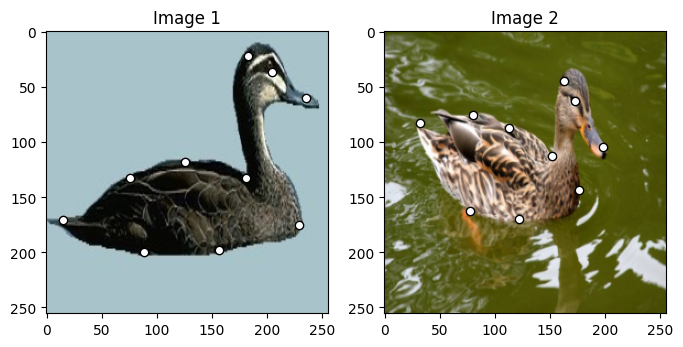

In [4]:
import matplotlib.pyplot as plt


def plot_image_with_graph(img, kpt, A=None):
   """
   Function to visualize an image with keypoints and optional graph connections
   
   Parameters:
   - img: Input image to be displayed
   - kpt: Keypoints array with shape (2, N) where N is number of keypoints
   - A: Optional adjacency matrix for drawing connections between keypoints
   """
   # Display the input image
   plt.imshow(img)
   
   # Plot keypoints as white dots with black edges
   plt.scatter(kpt[0], kpt[1], c='w', edgecolors='k')
   
   # If an adjacency matrix is provided, draw connections between keypoints
   if A is not None:
       # Iterate through non-zero elements in adjacency matrix
       for idx in np.nonzero(A, as_tuple=False):
           # Draw black lines between connected keypoints
           # idx[0] is start point index, idx[1] is end point index
           plt.plot((kpt[0, idx[0]], kpt[0, idx[1]]), # x-coordinates of line
                   (kpt[1, idx[0]], kpt[1, idx[1]]),  # y-coordinates of line
                   'k-')                               # black solid line style

# Create a figure with specific size (8 inches width, 4 inches height)
plt.figure(figsize=(8, 4))

# Create first subplot for Image 1
plt.subplot(1, 2, 1)          # 1 row, 2 columns, first position
plt.title('Image 1')          # Set title for first subplot
plot_image_with_graph(img1, kpts1)  # Plot first image with its keypoints

# Create second subplot for Image 2
plt.subplot(1, 2, 2)          # 1 row, 2 columns, second position
plt.title('Image 2')          # Set title for second subplot
plot_image_with_graph(img2, kpts2)  # Plot second image with its keypoints

In [ ]:
# Import necessary libraries
import numpy as np          # Import NumPy for numerical operations and array handling
from PIL import Image      # Import PIL (Python Imaging Library) for image processing
import scipy.io as sio     # Import SciPy's IO module for reading .mat files

# Define target size for image resizing (256x256 pixels)
obj_resize = (256, 256)

# Load duck images from the Willow Object Dataset
# These images will be used for feature matching
img1 = Image.open('WILLOW-ObjectClass_dataset/WILLOW-ObjectClass/Duck/060_0000.png')  # Load first duck image
img2 = Image.open('WILLOW-ObjectClass_dataset/WILLOW-ObjectClass/Duck/060_0010.png')  # Load second duck image

# Load keypoint annotations from corresponding .mat files
# 'pts_coord' contains the coordinates of manually annotated keypoints for each image
# Convert the MATLAB format to NumPy arrays for easier processing
kpts1 = np.array(sio.loadmat('WILLOW-ObjectClass_dataset/WILLOW-ObjectClass/Duck/060_0000.mat')['pts_coord'])  # Keypoints for first image
kpts2 = np.array(sio.loadmat('WILLOW-ObjectClass_dataset/WILLOW-ObjectClass/Duck/060_0010.mat')['pts_coord'])  # Keypoints for second image

# Scale keypoint coordinates to match the new image dimensions
# This ensures keypoints remain aligned when images are resized
kpts1[0] = kpts1[0] * obj_resize[0] / img1.size[0]  # Scale x-coordinates of first image keypoints
kpts1[1] = kpts1[1] * obj_resize[1] / img1.size[1]  # Scale y-coordinates of first image keypoints
kpts2[0] = kpts2[0] * obj_resize[0] / img2.size[0]  # Scale x-coordinates of second image keypoints
kpts2[1] = kpts2[1] * obj_resize[1] / img2.size[1]  # Scale y-coordinates of second image keypoints

# Resize both images to the target size (256x256)
# Using BILINEAR interpolation for smooth resizing
img1 = img1.resize(obj_resize, resample=Image.BILINEAR)  # Resize first image
img2 = img2.resize(obj_resize, resample=Image.BILINEAR)  # Resize second image